In [35]:
#Load Image, View, Save - OpenCV, PIL
import cv2
import numpy as np
image = cv2.imread('ireland.jpg', 1)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

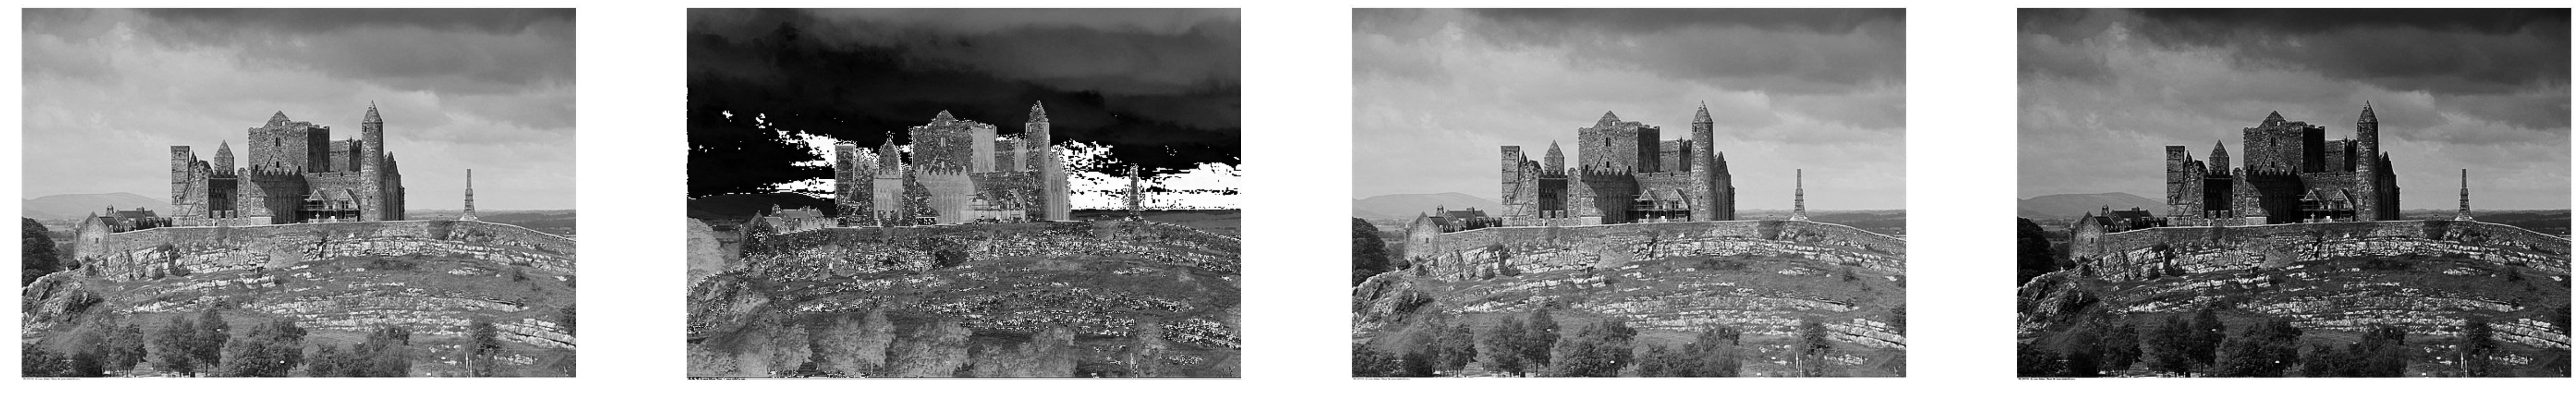

In [3]:
#Intensity Transformation - Negative, Log, Gamma Transform
from PIL import Image
from pylab import *

ht = array(Image.open('ireland.jpg').convert('L'))
ht2 = 200 - ht #invert image
ht3 = (100.0/200) * ht + 100 #clamp to interval 100...200
ht4 = 255.0 * (ht/200.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(64, 64))

axs[0].imshow(ht)
axs[0].axis('off')
axs[1].imshow(ht2)
axs[1].axis('off')
axs[2].imshow(ht3)
axs[2].axis('off')
axs[3].imshow(ht4)
axs[3].axis('off')

gray()
plt.show()

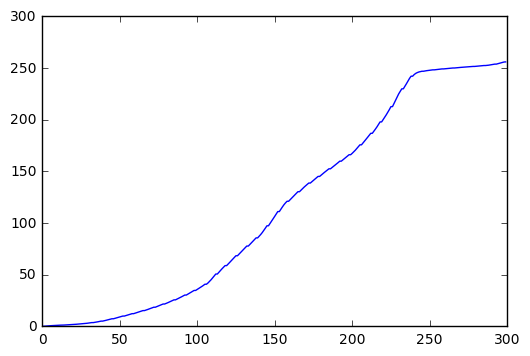

In [4]:
#Histogram Equalization
def histeq(ht,nbr_bins=300):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(ht.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 256 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    ht2 = interp(ht.flatten(),bins[:-1],cdf)
    return ht2.reshape(ht.shape), cdf

ht2,cdf = histeq(ht)
figure()
plot(cdf)
plt.show()

In [121]:
# Intensity Transform - Negative, Log, Gamma Transform
import sys
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

# import matplotlib.pyplot as pl
# read image to array
image = cv2.imread('images\ireland.jpg',0)
row,col=image.shape

In [168]:
#Negative
negative=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        negative[i][j]=255-image[i][j]
plt.imshow(negative)

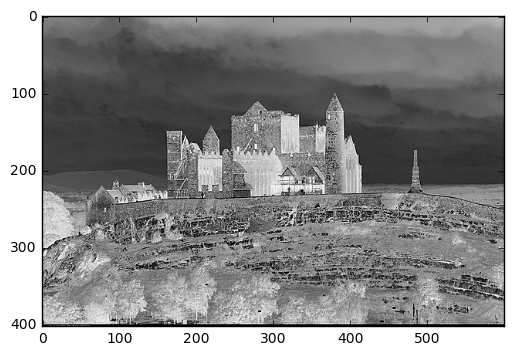

In [169]:
plt.show()

In [170]:
#Log
log=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        log[i][j]=150*log10(1+img[i][j])
plt.imshow(log)

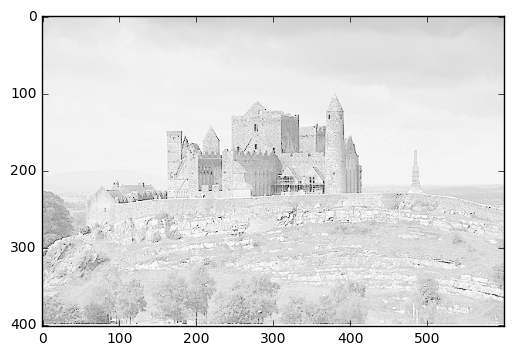

In [171]:
plt.show()

In [172]:
#Gamma
gamma=np.zeros((row,col))
g=0.5
for i in range (row):
    for j in range (col):
        gamma[i][j]=50*pow(img[i][j],g)
plt.imshow(gamma)

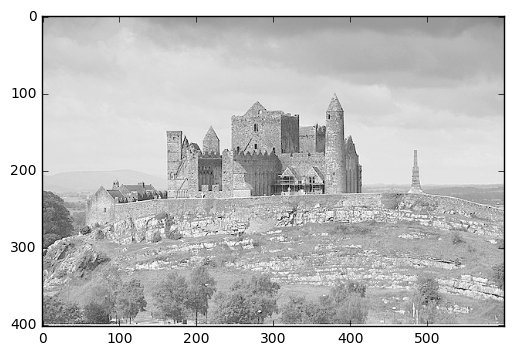

In [173]:
plt.show()

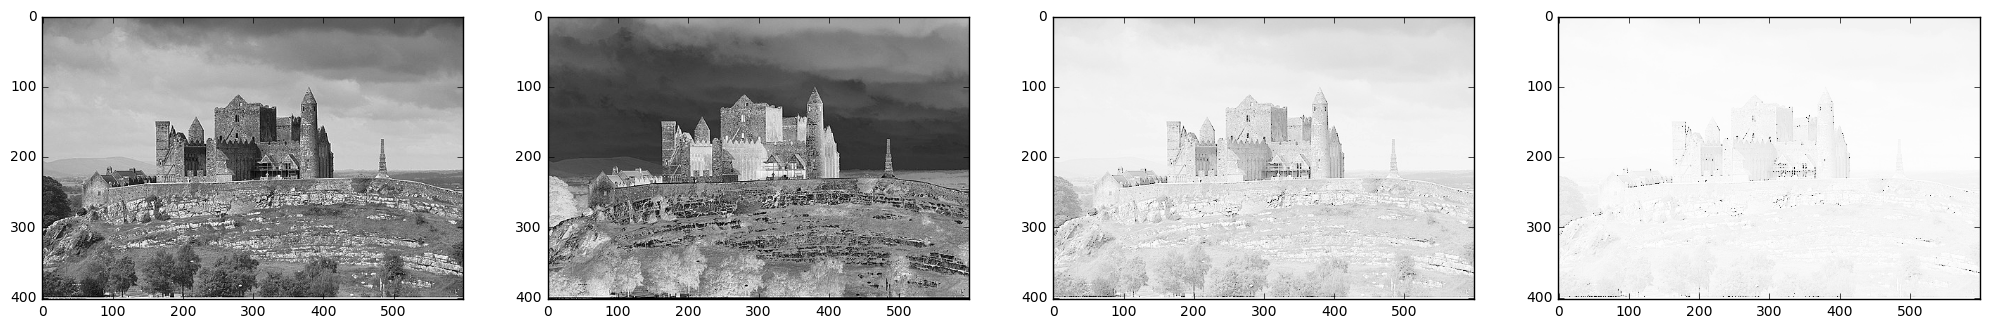

In [135]:
negative=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        negative[i][j]=255-image[i][j]
    

log=np.zeros((row,col))
for i in range (row):
    for j in range (col):
        log[i][j]=50*log10(1+image[i][j])


gamma=np.zeros((row,col))
g=0.05
for i in range (row):
    for j in range (col):
        gamma[i][j]=50*pow(image[i][j],g)

        
fig, axs = subplots(1, 4, figsize=(25, 25))
axs[0].imshow(image)
axs[0].axis('on')
axs[1].imshow(negative)
axs[1].axis('on')
axs[2].imshow(log)
axs[2].axis('on')
axs[3].imshow(gamma)
axs[3].axis('on')
gray()
plt.show()

In [136]:
#Image Convolution - Average, Laplacian
Ave = array(Image.open('images/ireland.jpg'))
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

fig, axs = subplots(1, 2, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('on')
axs[1].imshow(Ave)
axs[1].axis('on')
gray()
plt.show()

TypeError: 'Text' object is not callable

In [26]:
# Averaging Operation
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/ireland.jpg', 0)
blur = cv2.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
gray()
plt.show()

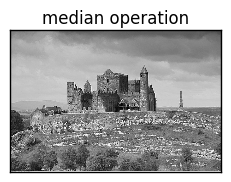

In [27]:
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('median operation')
plt.xticks([]), plt.yticks([])
gray()
plt.show()

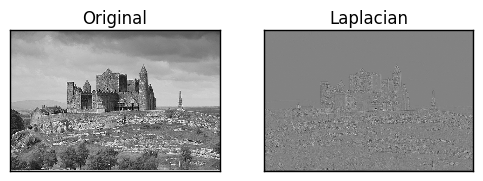

In [28]:
#Laplacian  Operation
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/ireland.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

In [293]:
####
from scipy import ndimage
import matplotlib.pyplot as plt

In [294]:
im = np.zeros((35, 35))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2*np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise, 8)

In [295]:
plt.figure(figsize=(16, 5))

In [296]:
plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('on')
plt.title('Original', fontsize=20)

In [297]:
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('on')
plt.title('Noisy', fontsize=20)

In [298]:
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('on')
plt.title('Median', fontsize=20)

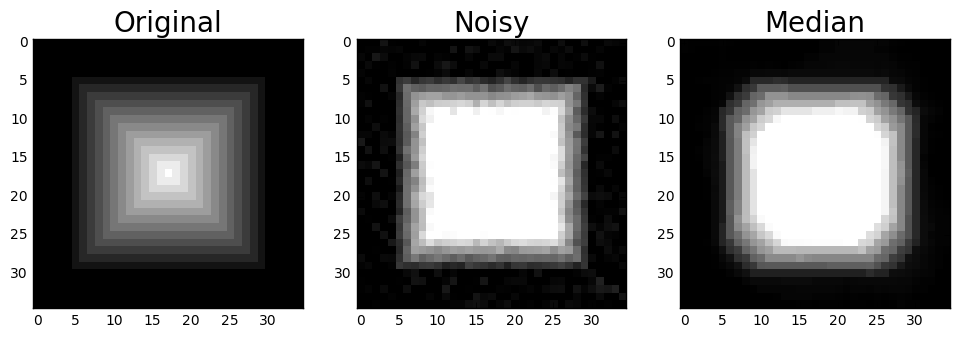

In [299]:
plt.show()